In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm as lgb
from sklearn.model_selection import KFold
import warnings
import time
import sys
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows',300)
from scipy.stats import mode
from scipy import stats
import feather
import re
import warnings
import random

from IPython.display import clear_output

In [2]:
target = pd.read_csv('target2',header=None,index_col=0)

In [152]:
train = pd.read_csv('C:\\kdata\\train.csv')
test = pd.read_csv('C:\\kdata\\test.csv')

In [6]:
train['first_active_month_coded'] = train['first_active_month'].astype(np.datetime64)
train['first_active_month_coded'] = (train['first_active_month_coded'].dt.year-2011)*12+train['first_active_month_coded'].dt.month

In [8]:
train['target'] = target

In [10]:
train['target_binary'] = (train.target < -30).astype(np.int16)

In [16]:
train['first_active_month'] = train['first_active_month'].astype(np.datetime64)

In [17]:
train['activation_year'] = train['first_active_month'].dt.year
train['activation_months'] = train['first_active_month'].dt.month

In [18]:
train

,first_active_month,card_id,feature_1,feature_2,feature_3,target,first_active_month_coded,target_binary,activation_year,activation_months
0,2017-06-01,C_ID_92a2005557,5,2,1,-0.820283,78,0,2017,6
1,2017-01-01,C_ID_3d0044924f,4,1,0,0.392913,73,0,2017,1
2,2016-08-01,C_ID_d639edf6cd,2,2,0,0.688056,68,0,2016,8
3,2017-09-01,C_ID_186d6a6901,4,3,0,0.142495,81,0,2017,9
4,2017-11-01,C_ID_cdbd2c0db2,1,3,0,-0.159749,83,0,2017,11
5,2016-09-01,C_ID_0894217f2f,4,2,0,0.871585,69,0,2016,9
6,2016-12-01,C_ID_7e63323c00,3,2,1,0.230129,72,0,2016,12
7,2017-09-01,C_ID_dfa21fc124,3,2,1,2.135850,81,0,2017,9
8,2017-08-01,C_ID_fe0fdac8ea,2,1,0,-0.065406,80,0,2017,8
9,2016-08-01,C_ID_bf62c0b49d,2,2,0,0.300062,68,0,2016,8


In [19]:
groupped_by_coded_months = train.groupby(['first_active_month_coded']).agg({'target_binary':'mean'})
groupped_by_year = train.groupby(['activation_year']).agg({'target_binary':'mean'})
groupped_by_months = train.groupby(['activation_months']).agg({'target_binary':'mean'})

In [27]:
groupped_by_coded_months.reset_index(inplace=True)
groupped_by_year.reset_index(inplace=True)
groupped_by_months.reset_index(inplace=True)

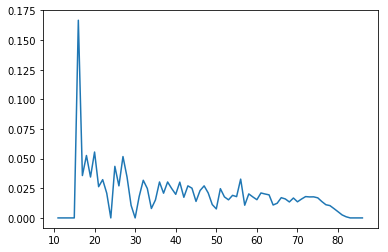

In [34]:
fig, ax = plt.subplots()
ax.plot(groupped_by_coded_months.first_active_month_coded , groupped_by_coded_months.target_binary)

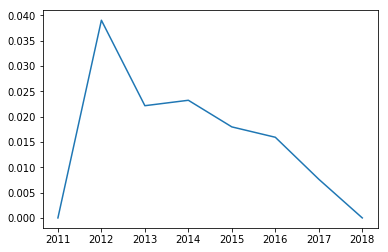

In [37]:
fig, ax = plt.subplots()
ax.plot(groupped_by_year.activation_year , groupped_by_year.target_binary)

In [38]:
groupped_by_months.head()

,activation_months,target_binary
0,1,0.017925
1,2,0.017879
2,3,0.018135
3,4,0.013841
4,5,0.012327


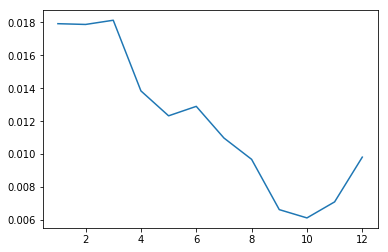

In [39]:
fig, ax = plt.subplots()
ax.plot(groupped_by_months.activation_months , groupped_by_months.target_binary)

In [40]:
test['first_active_month_coded'] = test['first_active_month'].astype(np.datetime64)
test['first_active_month_coded'] = (test['first_active_month_coded'].dt.year-2011)*12+test['first_active_month_coded'].dt.month

In [46]:
train.head()

,first_active_month,card_id,feature_1,feature_2,feature_3,target,first_active_month_coded,target_binary,activation_year,activation_months
0,2017-06-01,C_ID_92a2005557,5,2,1,-0.820283,78,0,2017,6
1,2017-01-01,C_ID_3d0044924f,4,1,0,0.392913,73,0,2017,1
2,2016-08-01,C_ID_d639edf6cd,2,2,0,0.688056,68,0,2016,8
3,2017-09-01,C_ID_186d6a6901,4,3,0,0.142495,81,0,2017,9
4,2017-11-01,C_ID_cdbd2c0db2,1,3,0,-0.159749,83,0,2017,11


In [47]:
test.head()

,first_active_month,card_id,feature_1,feature_2,feature_3,first_active_month_coded
0,2017-04,C_ID_0ab67a22ab,3,3,1,76.0
1,2017-01,C_ID_130fd0cbdd,2,3,0,73.0
2,2017-08,C_ID_b709037bc5,5,1,1,80.0
3,2017-12,C_ID_d27d835a9f,2,1,0,84.0
4,2015-12,C_ID_2b5e3df5c2,5,1,1,60.0


In [48]:
groupped_by_coded_months

,first_active_month_coded,target_binary
0,11,0.000000
1,12,0.000000
2,14,0.000000
3,15,0.000000
4,16,0.166667


In [52]:
groupped_by_coded_months.columns = ['first_active_month_coded', 'outliners_months_percent']

In [54]:
train = pd.merge(train,groupped_by_coded_months,on='first_active_month_coded',how='left')

In [55]:
test = pd.merge(test,groupped_by_coded_months,on='first_active_month_coded',how='left')

In [58]:
train[['card_id','outliners_months_percent']].to_feather('train_months_outliner_percent')
test[['card_id','outliners_months_percent']].to_feather('test_months_outliner_percent')

In [155]:
new_transactions = pd.read_csv('C:\\kdata\\new_merchant_transactions.csv', usecols=['card_id','city_id','state_id','subsector_id'])
historical_transactions = pd.read_csv('C:\\kdata\\historical_transactions.csv',usecols=['card_id','city_id','state_id','subsector_id'])

all_transactions = pd.concat([new_transactions,historical_transactions],axis=0)

In [40]:
def count_uniques(x):
    uni_count = np.unique(x, return_counts=True)
    return list(pd.DataFrame(uni_count[1],uni_count[0]).sort_values(by=0,ascending=False).index[:3])

In [ ]:
def count2_uniques(x):
    uni_count = np.unique(x, return_counts=True)
    return list(pd.DataFrame(uni_count[1],uni_count[0]).sort_values(by=0,ascending=False).index[:2])

In [41]:
transactions_city_id = all_transactions.groupby(['card_id']).agg({'city_id':count_uniques})
transactions_city_id.reset_index(inplace=True)
transactions_city_id[['first_city','second_city','third_city']] = pd.DataFrame(transactions_city_id.city_id.values.tolist())

In [ ]:
transactions_state_id = all_transactions.groupby(['card_id']).agg({'state_id':count2_uniques})
transactions_state_id.reset_index(inplace=True)
transactions_state_id[['first_state','second_state']] = pd.DataFrame(transactions_state_id.state_id.values.tolist())

In [60]:
transactions_subsector_id = all_transactions.groupby(['card_id']).agg({'subsector_id':count_uniques})
transactions_subsector_id.reset_index(inplace=True)
transactions_subsector_id[['first_subsector','second_subsector','third_subsector']] = pd.DataFrame(transactions_subsector_id.subsector_id.values.tolist())

In [ ]:
transactions_city_id,transactions_state_id,transactions_subsector_id

In [64]:
transactions_city_id.drop(['city_id'],inplace=True,axis=1)

In [65]:
transactions_state_id.drop(['state_id'],inplace=True,axis=1)

In [66]:
transactions_subsector_id.drop(['subsector_id'],inplace=True,axis=1)

In [67]:
all_merged_most_common = pd.merge(transactions_city_id,transactions_state_id,how='left',on='card_id')
all_merged_most_common = pd.merge(all_merged_most_common,transactions_subsector_id,how='left',on='card_id')

In [68]:
all_merged_most_common.to_feather('almerged_most_common')

,card_id,first_city,second_city,third_city,first_state,second_state,first_subsector,second_subsector,third_subsector
0,C_ID_00007093c1,244,-1.0,76.0,2,-1.0,19,33.0,8.0
1,C_ID_0001238066,314,333.0,69.0,9,20.0,19,37.0,33.0
2,C_ID_0001506ef0,137,69.0,147.0,19,9.0,33,27.0,15.0
3,C_ID_0001793786,179,204.0,69.0,-1,24.0,37,27.0,33.0
4,C_ID_000183fdda,161,69.0,-1.0,3,9.0,16,37.0,27.0
5,C_ID_00024e244b,156,25.0,69.0,7,9.0,33,16.0,34.0
6,C_ID_0002709b5a,103,160.0,-1.0,18,21.0,33,19.0,27.0
7,C_ID_00027503e2,146,69.0,NaN,19,9.0,33,34.0,15.0
8,C_ID_000298032a,233,69.0,23.0,9,16.0,34,33.0,36.0
9,C_ID_0002ba3c2e,344,200.0,69.0,18,9.0,33,19.0,27.0


In [ ]:
# сделать тоже самое с закодированными
# перекодировать их в процент популярности
# добавить процент возврата карты по городам
# проверить как они распределяются
# сделать таблицу самых популярных продавцов и проверить в каких чаще всего возвращают либо просто сделать комбо из среднего возврата по магазинам

In [23]:
all_merged_most_common = feather.read_dataframe('merged_most_common_city_state_sub')

In [6]:
all_merged_most_common.head()

,card_id,first_city,second_city,third_city,first_state,second_state,first_subsector,second_subsector,third_subsector
0,C_ID_00007093c1,244,-1.0,76.0,2,-1.0,19,33.0,8.0
1,C_ID_0001238066,314,333.0,69.0,9,20.0,19,37.0,33.0
2,C_ID_0001506ef0,137,69.0,147.0,19,9.0,33,27.0,15.0
3,C_ID_0001793786,179,204.0,69.0,-1,24.0,37,27.0,33.0
4,C_ID_000183fdda,161,69.0,-1.0,3,9.0,16,37.0,27.0


In [17]:
train.target = (train.target < -30)

In [24]:
train = pd.merge(train[['card_id','target']],all_merged_most_common,on='card_id',how='left')

In [26]:
train.target = train.target.astype(np.int16)

In [33]:
first_city_out_percent = train.groupby(['first_city']).agg({'target':'mean'})
second_city_out_percent = train.groupby(['second_city']).agg({'target':'mean'})
third_city_out_percent = train.groupby(['third_city']).agg({'target':'mean'})

first_state_out_percent = train.groupby(['first_state']).agg({'target':'mean'})
second_state_out_percent = train.groupby(['second_state']).agg({'target':'mean'})

first_subsector_out_percent = train.groupby(['first_subsector']).agg({'target':'mean'})
second_subsector_out_percent = train.groupby(['second_subsector']).agg({'target':'mean'})
third_subsector_out_percent = train.groupby(['third_subsector']).agg({'target':'mean'})

In [58]:
first_city_out_percent.drop(-1,axis=0,inplace=True)
second_city_out_percent.drop(-1,axis=0,inplace=True)
third_city_out_percent.drop(-1,axis=0,inplace=True)

first_state_out_percent.drop(-1,axis=0,inplace=True)
second_state_out_percent.drop(-1,axis=0,inplace=True)

first_subsector_out_percent.drop(-1,axis=0,inplace=True)
second_subsector_out_percent.drop(-1,axis=0,inplace=True)
third_subsector_out_percent.drop(-1,axis=0,inplace=True)

(<matplotlib.axes._subplots.AxesSubplot at 0x226de793860>,)

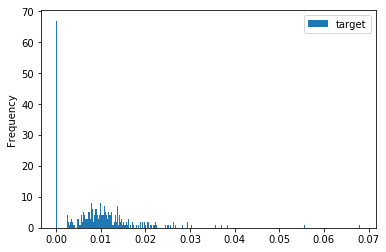

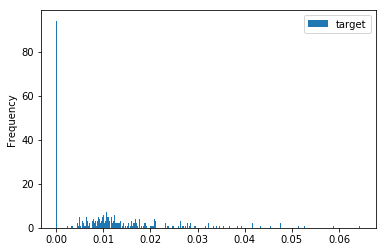

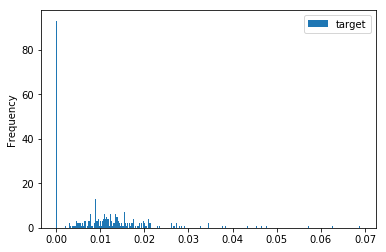

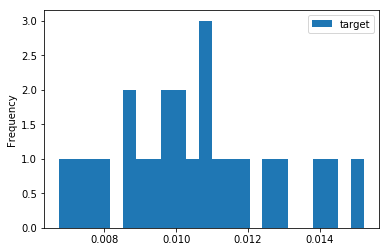

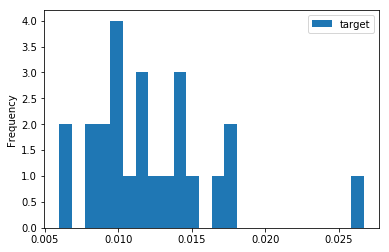

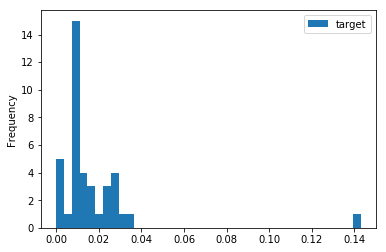

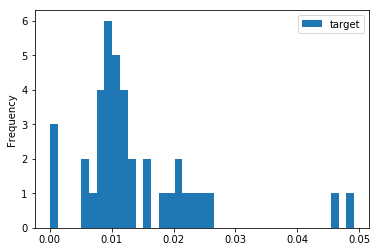

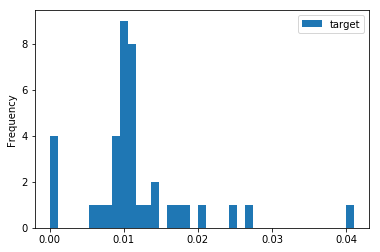

In [72]:
first_city_out_percent.plot.hist(bins=first_city_out_percent.shape[0]),
second_city_out_percent.plot.hist(bins=second_city_out_percent.shape[0]),
third_city_out_percent.plot.hist(bins=third_city_out_percent.shape[0]),

first_state_out_percent.plot.hist(bins=first_state_out_percent.shape[0]),
second_state_out_percent.plot.hist(bins=second_state_out_percent.shape[0]),

first_subsector_out_percent.plot.hist(bins=first_subsector_out_percent.shape[0]),
second_subsector_out_percent.plot.hist(bins=second_subsector_out_percent.shape[0]),
third_subsector_out_percent.plot.hist(bins=third_subsector_out_percent.shape[0]),

In [76]:
first_city_out_percent.reset_index(inplace=True)
second_city_out_percent.reset_index(inplace=True)
third_city_out_percent.reset_index(inplace=True)

first_state_out_percent.reset_index(inplace=True)
second_state_out_percent.reset_index(inplace=True)

first_subsector_out_percent.reset_index(inplace=True)
second_subsector_out_percent.reset_index(inplace=True)
third_subsector_out_percent.reset_index(inplace=True)

In [81]:
first_city_out_percent.columns = ['city','first_city_perc']
second_city_out_percent.columns = ['city','second_city_perc']
third_city_out_percent.columns = ['city','third_city_perc']

first_state_out_percent.columns = ['state','first_state_perc']
second_state_out_percent.columns = ['state','second_state_perc']

first_subsector_out_percent.columns = ['subsector','first_sub_perc']
second_subsector_out_percent.columns = ['subsector','second_sub_perc']
third_subsector_out_percent.columns = ['subsector','third_sub_perc']

In [82]:
city_average_out_per = pd.merge(first_city_out_percent,second_city_out_percent,how='left',on='city')
city_average_out_per = pd.merge(city_average_out_per,third_city_out_percent,how='left',on='city')

state_average_out_per = pd.merge(first_state_out_percent,second_state_out_percent,how='left',on='state')

subsector_average_out_per = pd.merge(first_subsector_out_percent,second_subsector_out_percent,how='left',on='subsector')
subsector_average_out_per = pd.merge(subsector_average_out_per,third_subsector_out_percent,how='left',on='subsector')

In [103]:
city_average_out_per['mean_city_out_percent'] = city_average_out_per[['first_city_perc', 'second_city_perc', 'third_city_perc']].mean(axis=1)
state_average_out_per['mean_state_out_percent'] = state_average_out_per[['first_state_perc','second_state_perc']].mean(axis=1)
subsector_average_out_per['mean_subsector_out_percent'] = subsector_average_out_per[['first_sub_perc','second_sub_perc','third_sub_perc']].mean(axis=1)

In [118]:
train = pd.merge(train,city_average_out_per[['city','mean_city_out_percent']].rename_axis({'city':'first_city','mean_city_out_percent':'first_city_mean_perct'},axis="columns"),on='first_city',how='left')
train = pd.merge(train,city_average_out_per[['city','mean_city_out_percent']].rename_axis({'city':'second_city','mean_city_out_percent':'second_city_mean_perct'},axis="columns"),on='second_city',how='left')
train = pd.merge(train,city_average_out_per[['city','mean_city_out_percent']].rename_axis({'city':'third_city','mean_city_out_percent':'third_city_mean_perct'},axis="columns"),on='third_city',how='left')

train = pd.merge(train,state_average_out_per[['state','mean_state_out_percent']].rename_axis({'state':'first_state','mean_state_out_percent':'first_state_mean_perct'},axis="columns"),on='first_state',how='left')
train = pd.merge(train,state_average_out_per[['state','mean_state_out_percent']].rename_axis({'state':'second_state','mean_state_out_percent':'second_state_mean_perct'},axis="columns"),on='second_state',how='left')

train = pd.merge(train,subsector_average_out_per[['subsector','mean_subsector_out_percent']].rename_axis({'subsector':'first_subsector','mean_subsector_out_percent':'first_subsector_mean_perct'},axis="columns"),on='first_subsector',how='left')
train = pd.merge(train,subsector_average_out_per[['subsector','mean_subsector_out_percent']].rename_axis({'subsector':'second_subsector','mean_subsector_out_percent':'second_subsector_mean_perct'},axis="columns"),on='second_subsector',how='left')
train = pd.merge(train,subsector_average_out_per[['subsector','mean_subsector_out_percent']].rename_axis({'subsector':'third_subsector','mean_subsector_out_percent':'third_subsector_mean_perct'},axis="columns"),on='third_subsector',how='left')

In [ ]:
train.drop('target',axis=1,inplace=True)

In [130]:
test = pd.merge(test[['card_id']],all_merged_most_common,on='card_id',how='left')

In [133]:
test = pd.merge(test,city_average_out_per[['city','mean_city_out_percent']].rename_axis({'city':'first_city','mean_city_out_percent':'first_city_mean_perct'},axis="columns"),on='first_city',how='left')
test = pd.merge(test,city_average_out_per[['city','mean_city_out_percent']].rename_axis({'city':'second_city','mean_city_out_percent':'second_city_mean_perct'},axis="columns"),on='second_city',how='left')
test = pd.merge(test,city_average_out_per[['city','mean_city_out_percent']].rename_axis({'city':'third_city','mean_city_out_percent':'third_city_mean_perct'},axis="columns"),on='third_city',how='left')

test = pd.merge(test,state_average_out_per[['state','mean_state_out_percent']].rename_axis({'state':'first_state','mean_state_out_percent':'first_state_mean_perct'},axis="columns"),on='first_state',how='left')
test = pd.merge(test,state_average_out_per[['state','mean_state_out_percent']].rename_axis({'state':'second_state','mean_state_out_percent':'second_state_mean_perct'},axis="columns"),on='second_state',how='left')

test = pd.merge(test,subsector_average_out_per[['subsector','mean_subsector_out_percent']].rename_axis({'subsector':'first_subsector','mean_subsector_out_percent':'first_subsector_mean_perct'},axis="columns"),on='first_subsector',how='left')
test = pd.merge(test,subsector_average_out_per[['subsector','mean_subsector_out_percent']].rename_axis({'subsector':'second_subsector','mean_subsector_out_percent':'second_subsector_mean_perct'},axis="columns"),on='second_subsector',how='left')
test = pd.merge(test,subsector_average_out_per[['subsector','mean_subsector_out_percent']].rename_axis({'subsector':'third_subsector','mean_subsector_out_percent':'third_subsector_mean_perct'},axis="columns"),on='third_subsector',how='left')

In [141]:
train['all_city_mean_perct'] = train[['first_city_mean_perct','second_city_mean_perct','third_city_mean_perct']].mean(axis=1)
train['all_state_mean_perct'] = train[['first_state_mean_perct','second_state_mean_perct']].mean(axis=1)
train['all_subsector_mean_perct'] = train[['first_subsector_mean_perct','second_subsector_mean_perct','third_subsector_mean_perct']].mean(axis=1)

In [142]:
test['all_city_mean_perct'] = test[['first_city_mean_perct','second_city_mean_perct','third_city_mean_perct']].mean(axis=1)
test['all_state_mean_perct'] = test[['first_state_mean_perct','second_state_mean_perct']].mean(axis=1)
test['all_subsector_mean_perct'] = test[['first_subsector_mean_perct','second_subsector_mean_perct','third_subsector_mean_perct']].mean(axis=1)

In [144]:
train.to_feather('train_agg_by_city_state_sub_out_per')
test.to_feather('test_agg_by_city_state_sub_out_per')

In [158]:
new_transactions = pd.read_csv('C:\\kdata\\new_merchant_transactions.csv', usecols=['card_id','merchant_id','merchant_category_id'])
historical_transactions = pd.read_csv('C:\\kdata\\historical_transactions.csv',usecols=['card_id','merchant_id','merchant_category_id'])

all_transactions = pd.concat([new_transactions,historical_transactions],axis=0)

In [154]:
train['target_binary'] = (train.target < -30).astype(np.int16)

In [160]:
train[['card_id','target_binary']]

,first_active_month,card_id,feature_1,feature_2,feature_3,target,target_binary
0,2017-06,C_ID_92a2005557,5,2,1,-0.820283,0
1,2017-01,C_ID_3d0044924f,4,1,0,0.392913,0
2,2016-08,C_ID_d639edf6cd,2,2,0,0.688056,0
3,2017-09,C_ID_186d6a6901,4,3,0,0.142495,0
4,2017-11,C_ID_cdbd2c0db2,1,3,0,-0.159749,0


In [161]:
all_transactions = pd.merge(all_transactions,train[['card_id','target_binary']],how='left',on='card_id')

In [ ]:
all_transactions.fillna(0,inplace=True)

In [170]:
merchant_outs = all_transactions.groupby(['merchant_id']).agg({'target_binary':'mean'})
merchant_cat_outs = all_transactions.groupby(['merchant_category_id']).agg({'target_binary':'mean'})

In [173]:
merchant_outs.drop(0,inplace=True)

In [174]:
merchant_cat_outs.drop(-1,inplace=True)

In [177]:
merchant_cat_outs.reset_index(inplace=True)
merchant_outs.reset_index(inplace=True)

In [182]:
merchant_cat_outs.columns = ['merchant_category_id', 'merch_cat_perct']
merchant_outs.columns = ['merchant_id', 'merch_perct']

In [183]:
all_transactions = pd.merge(all_transactions,merchant_cat_outs, on='merchant_category_id',how='left')
all_transactions = pd.merge(all_transactions,merchant_outs, on='merchant_id',how='left')

In [185]:
merch_and_merch_cat_prct = all_transactions.groupby(['card_id']).agg({'merch_cat_perct':'mean','merch_perct':'mean'})

In [187]:
merch_and_merch_cat_prct.reset_index().to_feather('merch_and_merch_cat_prct')

In [188]:
del new_transactions
del historical_transactions

del all_transactions

In [189]:
all_transactions = feather.read_dataframe('all_transactions')

In [ ]:
['card_id','merchant_category_id','state_id','subsector_id','city_id']

In [191]:
all_transactions = all_transactions[['card_id','merchant_category_id','state_id','subsector_id','city_id']]

In [193]:
all_transactions.columns = ['card_id','coded_merchant_category_id','coded_state_id','coded_subsector_id','coded_city_id']

In [195]:
all_transactions = pd.merge(all_transactions,train[['card_id','target_binary']],how='left',on='card_id')

In [196]:
all_transactions.fillna(0,inplace=True)

In [198]:
coded_merchant_category_id_outs_agg = all_transactions.groupby(['coded_merchant_category_id']).agg({'target_binary':'mean'})
coded_state_id_outs_agg = all_transactions.groupby(['coded_state_id']).agg({'target_binary':'mean'})
coded_subsector_id_outs_agg = all_transactions.groupby(['coded_subsector_id']).agg({'target_binary':'mean'})
coded_city_id_outs_agg = all_transactions.groupby(['coded_city_id']).agg({'target_binary':'mean'})

In [200]:
coded_merchant_category_id_outs_agg.columns = ['cd_merchant_category_id_prct_out']
coded_merchant_category_id_outs_agg.reset_index(inplace=True)

coded_state_id_outs_agg.columns = ['cd_state_id_prct_out']
coded_state_id_outs_agg.reset_index(inplace=True)

coded_subsector_id_outs_agg.columns = ['cd_subsector_id_prct_out']
coded_subsector_id_outs_agg.reset_index(inplace=True)

coded_city_id_outs_agg.columns = ['cd_city_id_prct_out']
coded_city_id_outs_agg.reset_index(inplace=True)

In [203]:
coded_subsector_id_outs_agg.head()

,coded_subsector_id,cd_subsector_id_prct_out
0,1,0.007576
1,3,0.012394
2,4,0.008387
3,5,0.007575
4,6,0.006405


In [204]:
all_transactions = pd.merge(all_transactions,coded_merchant_category_id_outs_agg , on='coded_merchant_category_id' ,how='left')
all_transactions = pd.merge(all_transactions,coded_state_id_outs_agg , on='coded_state_id' ,how='left')
all_transactions = pd.merge(all_transactions,coded_subsector_id_outs_agg , on='coded_subsector_id' ,how='left')
all_transactions = pd.merge(all_transactions,coded_city_id_outs_agg , on='coded_city_id' ,how='left')

In [206]:
all_transactions_coded_percent = all_transactions.groupby(['card_id']).agg({'cd_merchant_category_id_prct_out':'mean',
                                                                            'cd_state_id_prct_out':'mean',
                                                                            'cd_subsector_id_prct_out':'mean',
                                                                            'cd_city_id_prct_out':'mean'})

In [208]:
all_transactions_coded_percent.reset_index(inplace=True)

In [209]:
all_transactions_coded_percent.to_feather('all_transactions_coded_percent_out')